In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### load the modules

In [2]:
from lsst.cwfs.instrument import Instrument
from lsst.cwfs.algorithm import Algorithm
from lsst.cwfs.image import Image, readFile
import lsst.cwfs.plots as plots

### We use 25 fields for this test

In [3]:
ff = np.loadtxt('../tests/testImages/FAM/ccdCenter189.txt')
f25 = np.zeros((25,4))
ii = 0
for i in range(ff.shape[0]):
    if (ff[i,3] == 11 
        or (ff[i,2] == 14 and ff[i,3] == 12) 
        or (ff[i,2] == 10 and ff[i,3] == 10) 
        or (ff[i,2] == 34 and ff[i,3] == 12) 
        or (ff[i,2] == 30 and ff[i,3] == 10)):
        
        f25[ii,:] = ff[i,:]
        ii+=1
print(ii)
nField = ii

25


### distribution of the test fields:
(intra focal images shown)

<img src="./famTestFields.png" alt="famTestFields.png" width="800"/>,

In [6]:
rerun = 0
x0 = np.arange(4,23)

 0, R01_S11, fieldX = -1.41, fieldY = -0.71, fieldR = 1.58, WFS fieldR = 1.66
 1, R02_S11, fieldX = -1.41, fieldY = +0.00, fieldR = 1.41, WFS fieldR = 1.66
 2, R03_S11, fieldX = -1.41, fieldY = +0.71, fieldR = 1.58, WFS fieldR = 1.66
 3, R10_S10, fieldX = -0.71, fieldY = -1.65, fieldR = 1.79, WFS fieldR = 1.66
 4, R10_S11, fieldX = -0.71, fieldY = -1.41, fieldR = 1.58, WFS fieldR = 1.66
 5, R11_S11, fieldX = -0.71, fieldY = -0.71, fieldR = 1.00, WFS fieldR = 1.66
 6, R12_S11, fieldX = -0.71, fieldY = +0.00, fieldR = 0.71, WFS fieldR = 1.66
 7, R13_S11, fieldX = -0.71, fieldY = +0.71, fieldR = 1.00, WFS fieldR = 1.66
 8, R14_S11, fieldX = -0.71, fieldY = +1.41, fieldR = 1.58, WFS fieldR = 1.66
 9, R14_S12, fieldX = -0.71, fieldY = +1.65, fieldR = 1.79, WFS fieldR = 1.66
10, R20_S11, fieldX = +0.00, fieldY = -1.41, fieldR = 1.41, WFS fieldR = 1.66
11, R21_S11, fieldX = +0.00, fieldY = -0.71, fieldR = 0.71, WFS fieldR = 1.66
12, R22_S11, fieldX = +0.00, fieldY = +0.00, fieldR = 0.00, WFS 

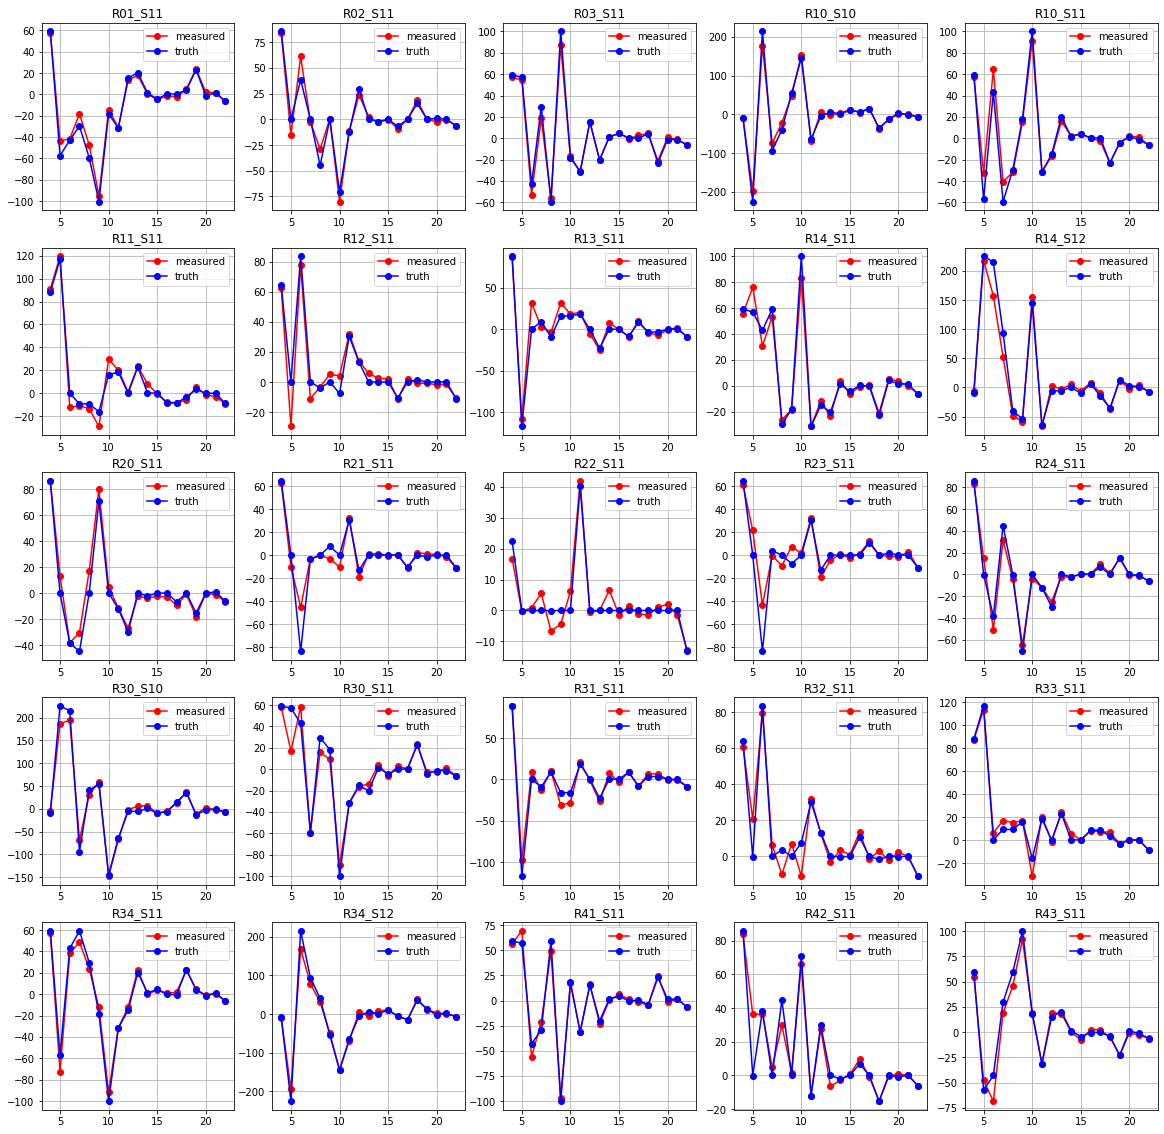

In [8]:
if rerun:
    testResults = np.zeros((nField, 19))
else:
    testResults = np.loadtxt('famTestResults.txt')    
fig, ax = plt.subplots(5,5, figsize=(20,20))
for iField in range(nField):
    fieldXY = [f25[iField, 0], f25[iField,1]]
    fieldR = np.sqrt(sum(np.array(fieldXY)**2))
    det = 'R%02d_S%02d'%(f25[iField, 2], f25[iField,3])
    print('%2d, %s, fieldX = %+.2f, fieldY = %+.2f, fieldR = %.2f, WFS fieldR = %.2f'%(
        iField, det, fieldXY[0], fieldXY[1], fieldR, 1.176*1.414))
    
    I1 = Image(readFile('../tests/testImages/FAM/Image_intra_%s.txt'%det), 
           fieldXY, Image.INTRA)
    I2 = Image(readFile('../tests/testImages/FAM/Image_extra_%s.txt'%det),
           fieldXY, Image.EXTRA)
    
    inst=Instrument('lsstfam',I1.sizeinPix)
    algo=Algorithm('exp',inst,0)
    if rerun:
        algo.runIt(inst,I1,I2,'offAxis')
    else:
        algo.zer4UpNm = testResults[iField, :]
    
    #truth from Zemax, in wave, wavelength = 500nm
    zTrue = np.loadtxt('../tests/testImages/FAM/zn_%s.txt'%det )
    
    irow = np.int8(iField/5)
    icol = np.mod(iField,5)
    ax[irow][icol].plot(x0, algo.zer4UpNm,'-ro', label='measured')
    ax[irow][icol].plot(x0, zTrue[3:22]*500,'-bo', label = 'truth') #wavelength = 500nm
    ax[irow][icol].grid()
    ax[irow][icol].legend()
    ax[irow][icol].set_title(det)
    
    if rerun:
        testResults[iField,:] = algo.zer4UpNm
if rerun:
    np.savetxt('famTestResults.txt', testResults)